In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
print(os.getcwd())

c:\FCD\Projects\LeagueOfLegends


Importing data

In [3]:
data = pd.read_csv('games.csv')
df = data.copy()

In [4]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [5]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [6]:
# 51490 Registros
df.shape

(51490, 61)

Importing champ and summoners spells dict

In [7]:
dict1 = pd.read_json('champion_info.json')
dict2 = pd.read_json('champion_info_2.json')

In [8]:
type(dict1)

pandas.core.frame.DataFrame

In [9]:
dict1.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."


In [10]:
# Vamos fazer a leitura da coluna 'data', que tem seu conteúdo no tipo dicionario
champInfo1 = pd.read_json((dict1['data']).to_json(), orient = 'index')
champInfo1.head()

,title,id,key,name
1,the Dark Child,1,Annie,Annie
10,The Judicator,10,Kayle,Kayle
101,the Magus Ascendant,101,Xerath,Xerath
102,the Half-Dragon,102,Shyvana,Shyvana
103,the Nine-Tailed Fox,103,Ahri,Ahri


In [11]:
# orient = 'index' : dict like {index -> {column -> value}}
champInfo2 = pd.read_json((dict2['data']).to_json(), orient= 'index')
champInfo2.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [12]:
# Removendo a linha acima
# champInfo.drop(champInfo[(champInfo.name == 'None')].index, axis = 0, inplace=  True)

In [13]:
champInfo2[(champInfo2.index == 'MonkeyKing')]

,tags,title,id,key,name
MonkeyKing,"[Fighter, Tank]",the Monkey King,62,MonkeyKing,Wukong


In [14]:
dict3 = pd.read_json('summoner_spell_info.json')

In [15]:
summon_spell = pd.read_json((dict3['data']).to_json(), orient = 'index')
summon_spell.head()

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


## Manipulação de Dados

In [16]:
champCols = ['t1_champ1id', 't1_champ2id','t1_champ3id','t1_champ4id', 't1_champ5id',
            't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']

banCols = ['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5',
           't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']

sumCols = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
           't1_champ4_sum1', 't1_champ4_sum2','t1_champ5_sum1', 't1_champ5_sum2','t2_champ1_sum1', 't2_champ1_sum2',
           't2_champ2_sum1', 't2_champ2_sum2','t2_champ3_sum1', 't2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
           't2_champ5_sum1', 't2_champ5_sum2']

In [17]:
champInfo2.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [18]:
# Função para transformar os ID's em nomes

def idToName(ID, dic):
    '''
    ID: ID do campeão da maneira em que se encontra no dataframe original
    dic: dicionario que contem as informações dos campeões (nome e seu respectivo ID)

    converter o ID para nome
    '''
    champ = dic['name'][ID]
    return champ

In [19]:
champInfo2['tags'][22]

['Marksman']

In [20]:
champInfo2 = champInfo2.set_index('id')
champInfo2.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [21]:
for i in champCols:
    df[i] = df[i].apply(lambda x: idToName(x, champInfo2))    

In [22]:
df[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [23]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,92,40,69,119,141,114,67,43,16,51
1,51,122,17,498,19,11,67,238,51,420
2,117,40,29,16,53,157,238,121,57,28
3,238,67,516,114,31,164,18,141,40,51
4,90,64,412,25,31,86,11,201,122,18


In [24]:
for i in banCols:
    df[i] = df[i].apply(lambda x: idToName(x, champInfo2))

In [25]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [26]:
summon_spell.head()

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [27]:
summon_spell = summon_spell.set_index('id')

In [28]:
summon_spell.head()

,summonerLevel,name,key,description
id,,,,
1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [29]:
df[sumCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,12,4,3,4,4,7,11,6,4,14,11,4,4,7,6,4,14,4,4,3
1,7,4,12,4,4,3,4,14,4,11,4,12,4,14,11,4,4,14,4,7
2,4,7,11,4,3,4,4,12,12,4,4,7,14,4,4,12,4,11,7,4
3,4,12,4,14,4,7,4,1,11,4,14,4,11,4,4,3,4,14,4,7
4,4,12,11,4,4,3,4,7,7,4,3,4,4,12,11,4,4,12,4,7


In [30]:
for i in sumCols:
    df[i] = df[i].apply(lambda x: idToName(x, summon_spell))

In [31]:
df[sumCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [32]:
# # Visualização
# champInfo2[(champInfo2.name != champInfo2.key)].head()

In [33]:
# Agora que já temos os nomes dos campeões no dataframe original ao invés do seus ID's, iremos settar os nomes como index para criarmos as novas
# colunas com as tags
champInfo2 = champInfo2.set_index(['name'])
champInfo2.head()

,tags,title,key
name,,,
Aatrox,"[Fighter, Tank]",the Darkin Blade,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri
Akali,[Assassin],the Fist of Shadow,Akali
Alistar,"[Tank, Support]",the Minotaur,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,Amumu


In [34]:
# Função para pegar a tag do campeão no df champInfo2
def getTag(champ, dict):
    """ champ = campeão o qual será extraido a tag
        dict = tabela provinda do arquivo json de onde será extraído a tag """
    
    tag = dict['tags'][champ][0]
    return tag

In [35]:
# Criar novas colunas com as tags dos campeões selecionados
for i in champCols:
    df[i + '_tag'] = df[i].apply(lambda x : getTag(x,champInfo2))

In [36]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


## Data Cleaning

In [82]:
# Não há valores missing
df.isna().any().sum()

0

In [38]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [ ]:
# A coluna 'gameDuration' está em segundos. Vemos que o valor mínimo apresentado é de aproximadamente 3 min.
# Jogos com tão pouca duração indicam remake da partida, que é quando algum dos jogadores não conseguem se conectar e então os player podem votar pra 
# cancelar a partida. Portanto iremos retirar todos os jogos que tenham menos de 6 minutos(360seg), visto que estes jogos não foram devidamente concluidos

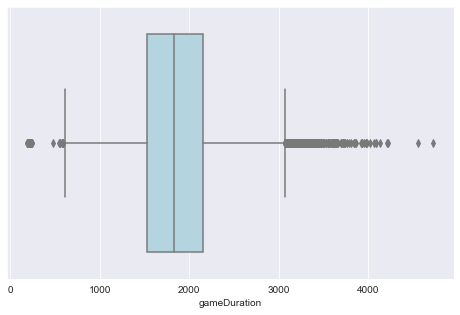

In [54]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.gameDuration, orient = 'h', color = 'lightblue')

In [57]:
df.drop(df[(df.gameDuration < 360)].index, axis = 0, inplace = True)

In [58]:
df.shape

(50295, 71)

In [66]:
# Houve jogos também em que não houve torres destruídas, o que seria impossível caso esse jogo tivesse sido finalizado.
# Vamos visualizar melhor esses registros
df[(df.firstTower == 0 )]
# Tivemos 18 registros de jogos sem torres destruidas

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
3157,3262904714,1499980174767,979,9,1,1,0,0,0,0,...,Fighter,Assassin,Fighter,Marksman,Support,Fighter,Support,Fighter,Mage,Marksman
4959,3316948857,1503595392473,930,9,1,2,0,0,0,2,...,Tank,Assassin,Fighter,Marksman,Support,Tank,Mage,Marksman,Fighter,Support
8468,3329578036,1504529070092,997,9,2,1,0,0,0,0,...,Fighter,Marksman,Fighter,Support,Fighter,Tank,Assassin,Marksman,Fighter,Mage
10438,3297517217,1502378559488,929,9,1,1,0,0,0,0,...,Fighter,Assassin,Fighter,Mage,Marksman,Tank,Support,Tank,Mage,Fighter
13738,3315835392,1503522673189,1127,9,1,2,0,0,0,0,...,Marksman,Support,Marksman,Mage,Tank,Assassin,Tank,Assassin,Marksman,Tank
14220,3309263941,1503093836607,925,9,1,2,0,0,0,1,...,Tank,Fighter,Mage,Assassin,Marksman,Mage,Support,Assassin,Fighter,Marksman
24132,3322754390,1504029671009,947,9,2,2,0,0,0,2,...,Mage,Marksman,Mage,Marksman,Tank,Tank,Support,Assassin,Marksman,Tank
26170,3327798893,1504386788010,941,9,2,2,0,0,0,0,...,Fighter,Marksman,Mage,Marksman,Tank,Marksman,Support,Marksman,Tank,Tank
27812,3323268812,1504091786081,926,9,1,1,0,0,0,0,...,Support,Tank,Marksman,Fighter,Mage,Marksman,Support,Marksman,Tank,Tank
29252,3319646639,1503807151597,964,9,1,1,0,0,0,0,...,Fighter,Fighter,Assassin,Support,Mage,Marksman,Support,Tank,Assassin,Assassin


É possivel analisar que em todos os jogos que foram finalizados sem primeira torre destruída possuem uma duração na faixa de aproximadamente 15 e 16 minutos, que é quando fica disponível para os times se renderem. Vemos também que nesses jogos houvem first bloods, então aparentemente foi um jogo válido. Dessa forma, esses dados fazem sentido e continuam no nosso dataset.

In [67]:
# Vamos dar uma olhada agora em jogos que não tiveram firstBlood
df[(df.firstBlood==0)]
# Após a limpeza prévia, os registro que continham fisrtBlood = 0 já foram retirados.

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag


In [68]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,5.029500e+04,5.029500e+04,50295.000000,50295.0,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,...,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000
mean,3.306266e+09,1.502928e+12,1871.151446,9.0,1.493747,1.487225,1.485098,1.339576,0.948524,1.477045,...,5.834775,1.041714,0.381131,1.420141,0.257441,5.681320,1.008490,0.424396,1.437717,0.245810
std,2.942656e+07,1.975774e+09,451.176812,0.0,0.499966,0.499842,0.500498,0.652932,0.839009,0.530594,...,3.740517,1.268976,0.587970,1.201752,0.437229,3.809503,1.261803,0.617642,1.219454,0.430571
min,3.214824e+09,1.496892e+12,477.000000,9.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.292274e+09,1.502025e+12,1554.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.320029e+09,1.503845e+12,1846.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,3.327103e+09,1.504353e+12,2156.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [70]:
# Agora vamos transformar os valores de 1 e 2 que representam o time para 'red' team e 'blue' team

# função:
def numToColor(x):
    """x -> valor a ser transformado em cor
    
    função que transforma valor 0 em 'blue' e 1 em 'red"""
    if x == 0:
        color = 'blue'
    elif x == 1:
        color = 'red'
    else:
        color = 'neither'
    return color

In [72]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [73]:
teamCols = ['winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron','firstDragon', 'firstRiftHerald']

In [75]:
for i in teamCols:
    df[i] = df[i].apply(lambda x: numToColor(x))

In [76]:
df[teamCols].head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,red,neither,red,red,red,red,neither
1,red,red,red,red,blue,red,red
2,red,neither,red,red,red,neither,blue
3,red,red,red,red,red,red,blue
4,red,neither,red,red,red,red,blue


## Data Analysis

In [37]:
#TODO:
# campeões mais selecionados
# campeões mais banidos
# summoners spells mais usadas
# tipos de campeões mais selecionados

### Campões mais Selecionados

In [83]:
df[champCols]

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn
...,...,...,...,...,...,...,...,...,...,...
51485,Warwick,Kalista,Talon,Bard,Lee Sin,Veigar,Yorick,Vayne,Janna,Gragas
51486,Malzahar,Amumu,Cho'Gath,Thresh,Tristana,Shyvana,Kalista,Leona,Nasus,Veigar
51487,Kayn,Tristana,Bard,Ezreal,Rumble,Annie,Draven,Rammus,Karma,Lux
51488,Kha'Zix,Lucian,Illaoi,Braum,Lux,Miss Fortune,Nocturne,Morgana,Karthus,Master Yi
